In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat

In [33]:
# from google.colab import files
# files.upload()

In [34]:
!pwd

/home/sergio/Desktop/DataScienceHW/HW6


In [35]:
data_url = '/home/sergio/Desktop/DataScienceHW/HW6/data'

In [36]:
data_2d = pd.read_csv(data_url+'/data_2d.csv', header=None)
data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


Залишимо ліше 2 і 3 стовбец в датасеті

In [37]:
data_2d = data_2d.iloc[:, 1:]
data_2d

,1,2
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218
...,...,...
195,0.629144,4.378584
196,-0.723824,5.361801
197,1.346107,2.333476
198,3.608219,3.411546


---
# Застосування ліктевого методу
---

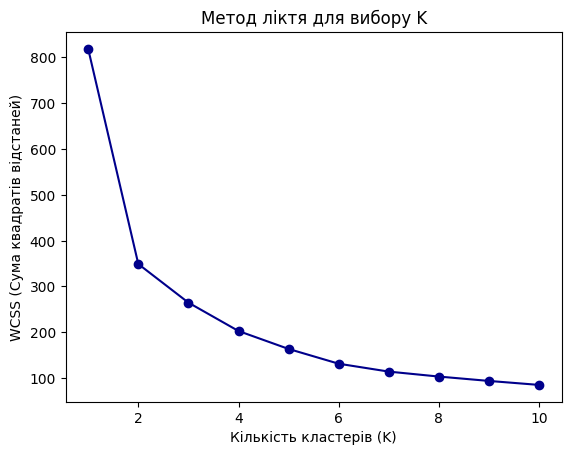

In [38]:
# Масив для збереження WCSS - Within-Cluster Sum of Squares
wcss = []  # сума квадратів відстаней всередині кластерів

# Тестуємо значення K від 1 до 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_2d)
    wcss.append(kmeans.inertia_)

# Будуємо графік
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='darkblue')
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('WCSS (Сума квадратів відстаней)')
plt.title('Метод ліктя для вибору K')
plt.show()

Отже як можна побачити з графіку ліктьового методу оптимальна кількість кластерів дорівнює k=2. Проведемо кластеризацію та додамо до нашого датасету стовпець Cluster, що містить мітки кластерів:

In [39]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_2d)

data_2d['Cluster'] = kmeans.labels_
data_2d

,1,2,Cluster
0,-0.768716,0.460860,0
1,2.687848,2.366961,1
2,-0.201379,0.470430,0
3,0.608496,1.225400,0
4,-0.082282,1.137218,0
...,...,...,...
195,0.629144,4.378584,1
196,-0.723824,5.361801,1
197,1.346107,2.333476,0
198,3.608219,3.411546,1


---
# Візуалізація кластерів
---

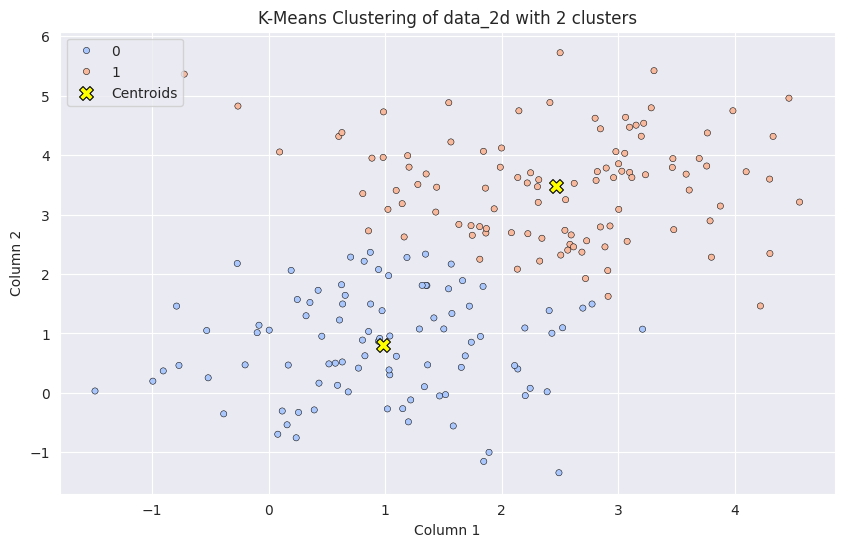

In [44]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Візуалізація кластерів
sns.scatterplot(data=data_2d, x=data_2d.columns[0], y=data_2d.columns[1], 
                hue="Cluster", palette="coolwarm", s=20, edgecolor="k")

# Додаємо центроїди
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

# Використовуємо назви перших двох стовпців для підписів осей
plt.xlabel(f'Column {data_2d.columns[0]}')
plt.ylabel(f'Column {data_2d.columns[1]}')

plt.title(f'K-Means Clustering of data_2d with {kmeans.n_clusters} clusters')
plt.legend()
plt.show()